In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score #for selecting better kernal
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE # for recusivly selecting the best features for prediction
import seaborn as sns # for correlation analysis
import matplotlib.pyplot as plt # for corelation analysis
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import pickle

### Load the input data file describing the predicting the breast cancer

In [2]:
df=pd.read_csv(r'D:\Surya files\DataScience\ML\Classification\SVM\breastCancerDetection\input\data.csv')

id: Identification number for each instance (patient).
diagnosis: The diagnosis outcome, usually classified as malignant (M) or benign (B).
radius_mean: Mean of distances from center to points on the perimeter.
texture_mean: Standard deviation of gray-scale values.
perimeter_mean: Mean size of the core tumor.
area_mean: Mean area of the core tumor.
smoothness_mean: Mean of local variation in radius lengths.
compactness_mean: Mean of perimeter^2 / area - 1.0.
concavity_mean: Mean severity of concave portions of the contour.
concave points_mean: Mean number of concave portions of the contour.
symmetry_mean: Mean symmetry of cell nuclei.
fractal_dimension_mean: Mean "coastline approximation" - 1.
radius_se: Standard error of the mean of distances from center to points on the perimeter.
texture_se: Standard error of standard deviation of gray-scale values.
perimeter_se: Standard error of size of the core tumor.
area_se: Standard error of area of the core tumor.
smoothness_se: Standard error of local variation in radius lengths.
compactness_se: Standard error of perimeter^2 / area - 1.0.
concavity_se: Standard error of severity of concave portions of the contour.
concave points_se: Standard error for number of concave portions of the contour.
symmetry_se: Standard error for symmetry of cell nuclei.
fractal_dimension_se: Standard error for "coastline approximation" - 1.
radius_worst: Worst or largest mean value for mean of distances from center to points on the perimeter.
texture_worst: Worst or largest mean value for standard deviation of gray-scale values.
perimeter_worst: Worst or largest mean value for size of the core tumor.
area_worst: Worst or largest mean value for area of the core tumor.
smoothness_worst: Worst or largest mean value for local variation in radius lengths.
compactness_worst: Worst or largest mean value for perimeter^2 / area - 1.0.
concavity_worst: Worst or largest mean value for severity of concave portions of the contour.
concave points_worst: Worst or largest mean value for number of concave portions of the contour.
symmetry_worst: Worst or largest mean value for symmetry of cell nuclei.
fractal_dimension_worst: Worst or largest mean value for "coastline approximation" - 1

In [3]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [4]:
dff=df.drop(columns=["Unnamed: 32"])

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
print('Total no of features',len(df.columns)-1)

Total no of features 32


### checking if empty values are there or not

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## correlation analysis

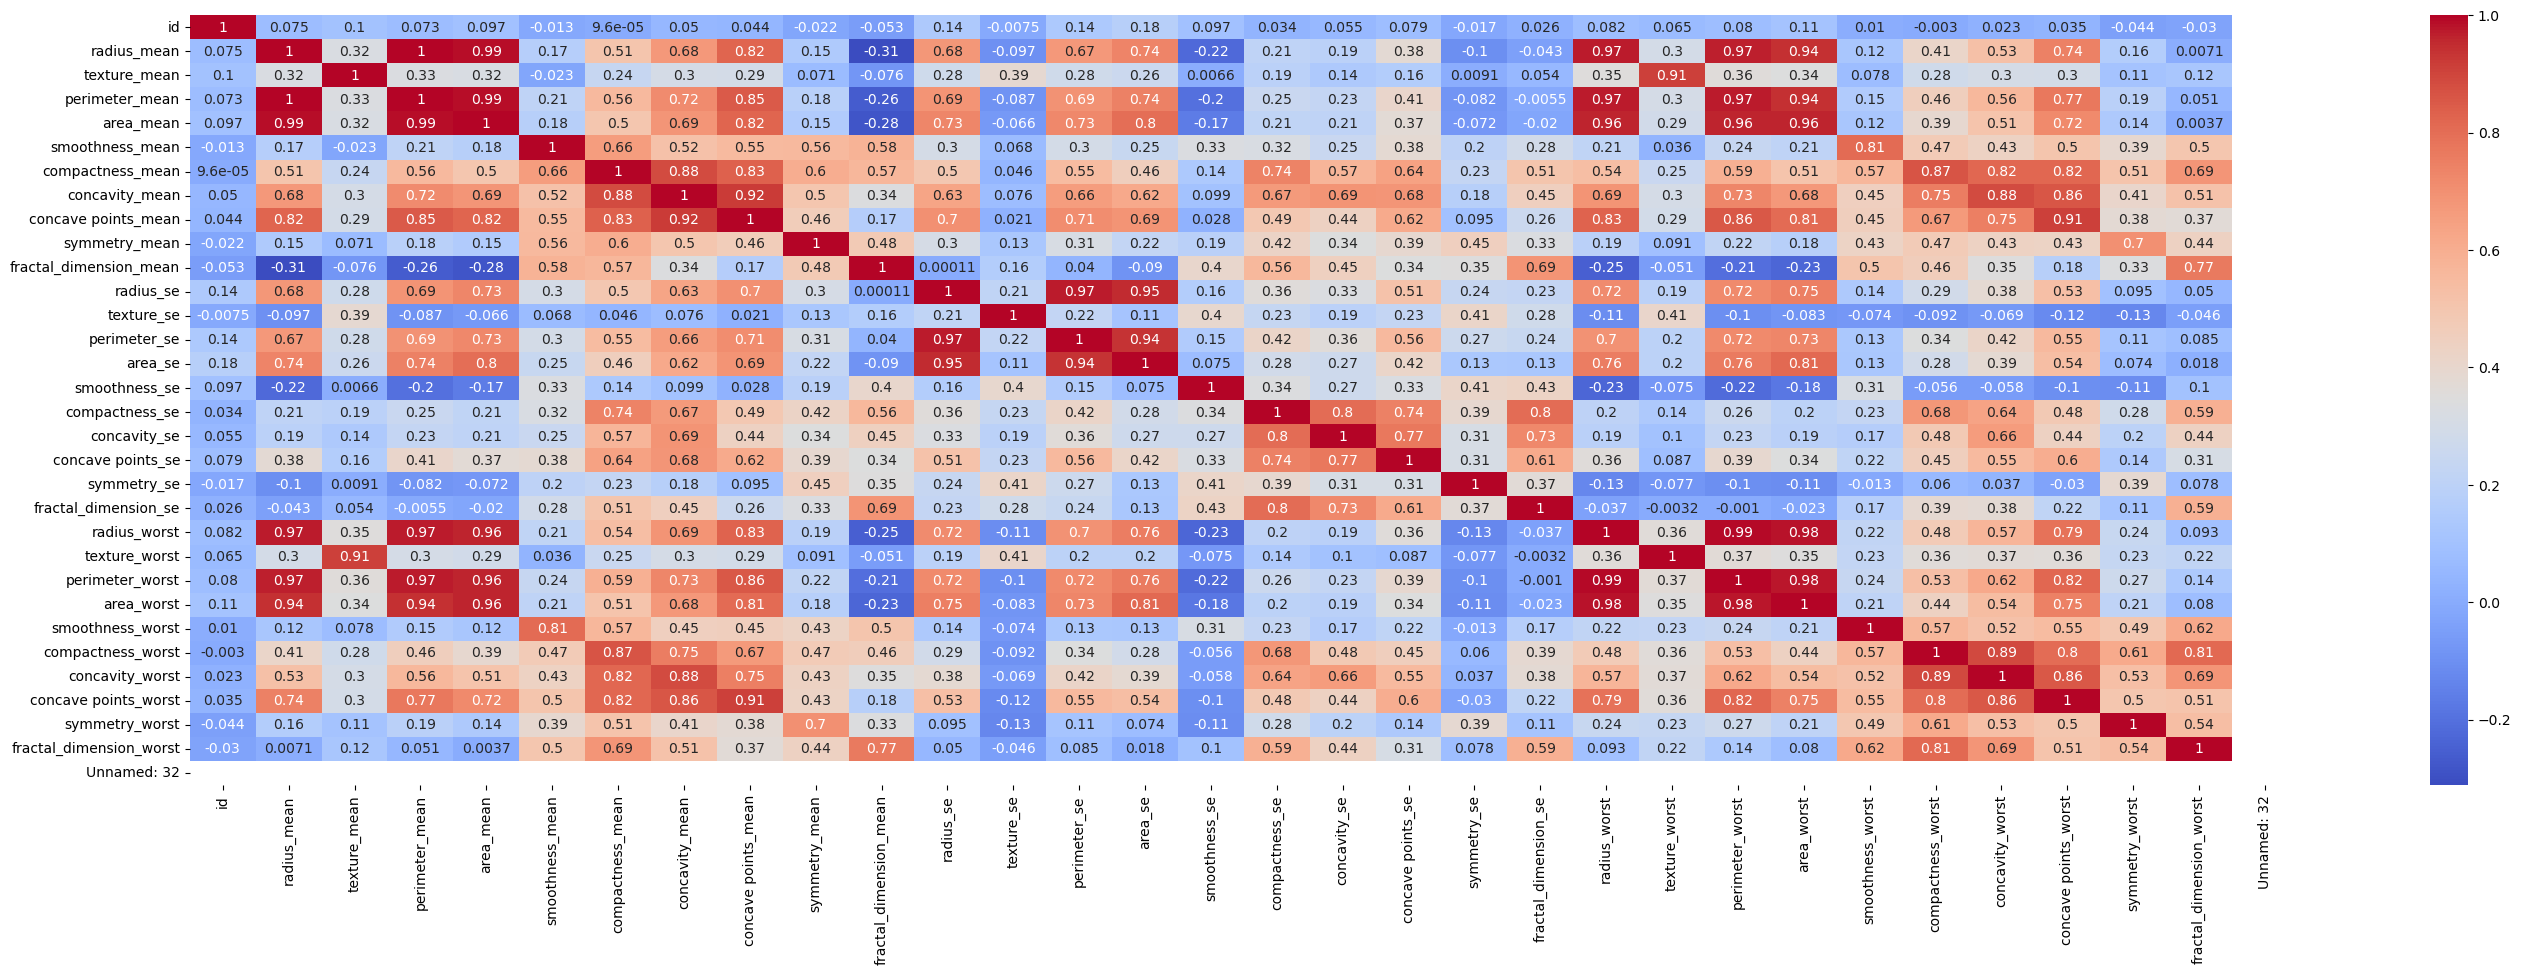

In [9]:
corr=df.corr()
plt.figure(figsize=(34,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

## since diagnosis containes catagorical variable i am encoding to 0 and 1 for corelation purpose other wise i need to use you can compute the correlation for categorical data using techniques like Cramer's V

In [10]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
df['diagnosis']=df['diagnosis'].apply(lambda x:1 if x=="M" else 0)

In [12]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [15]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

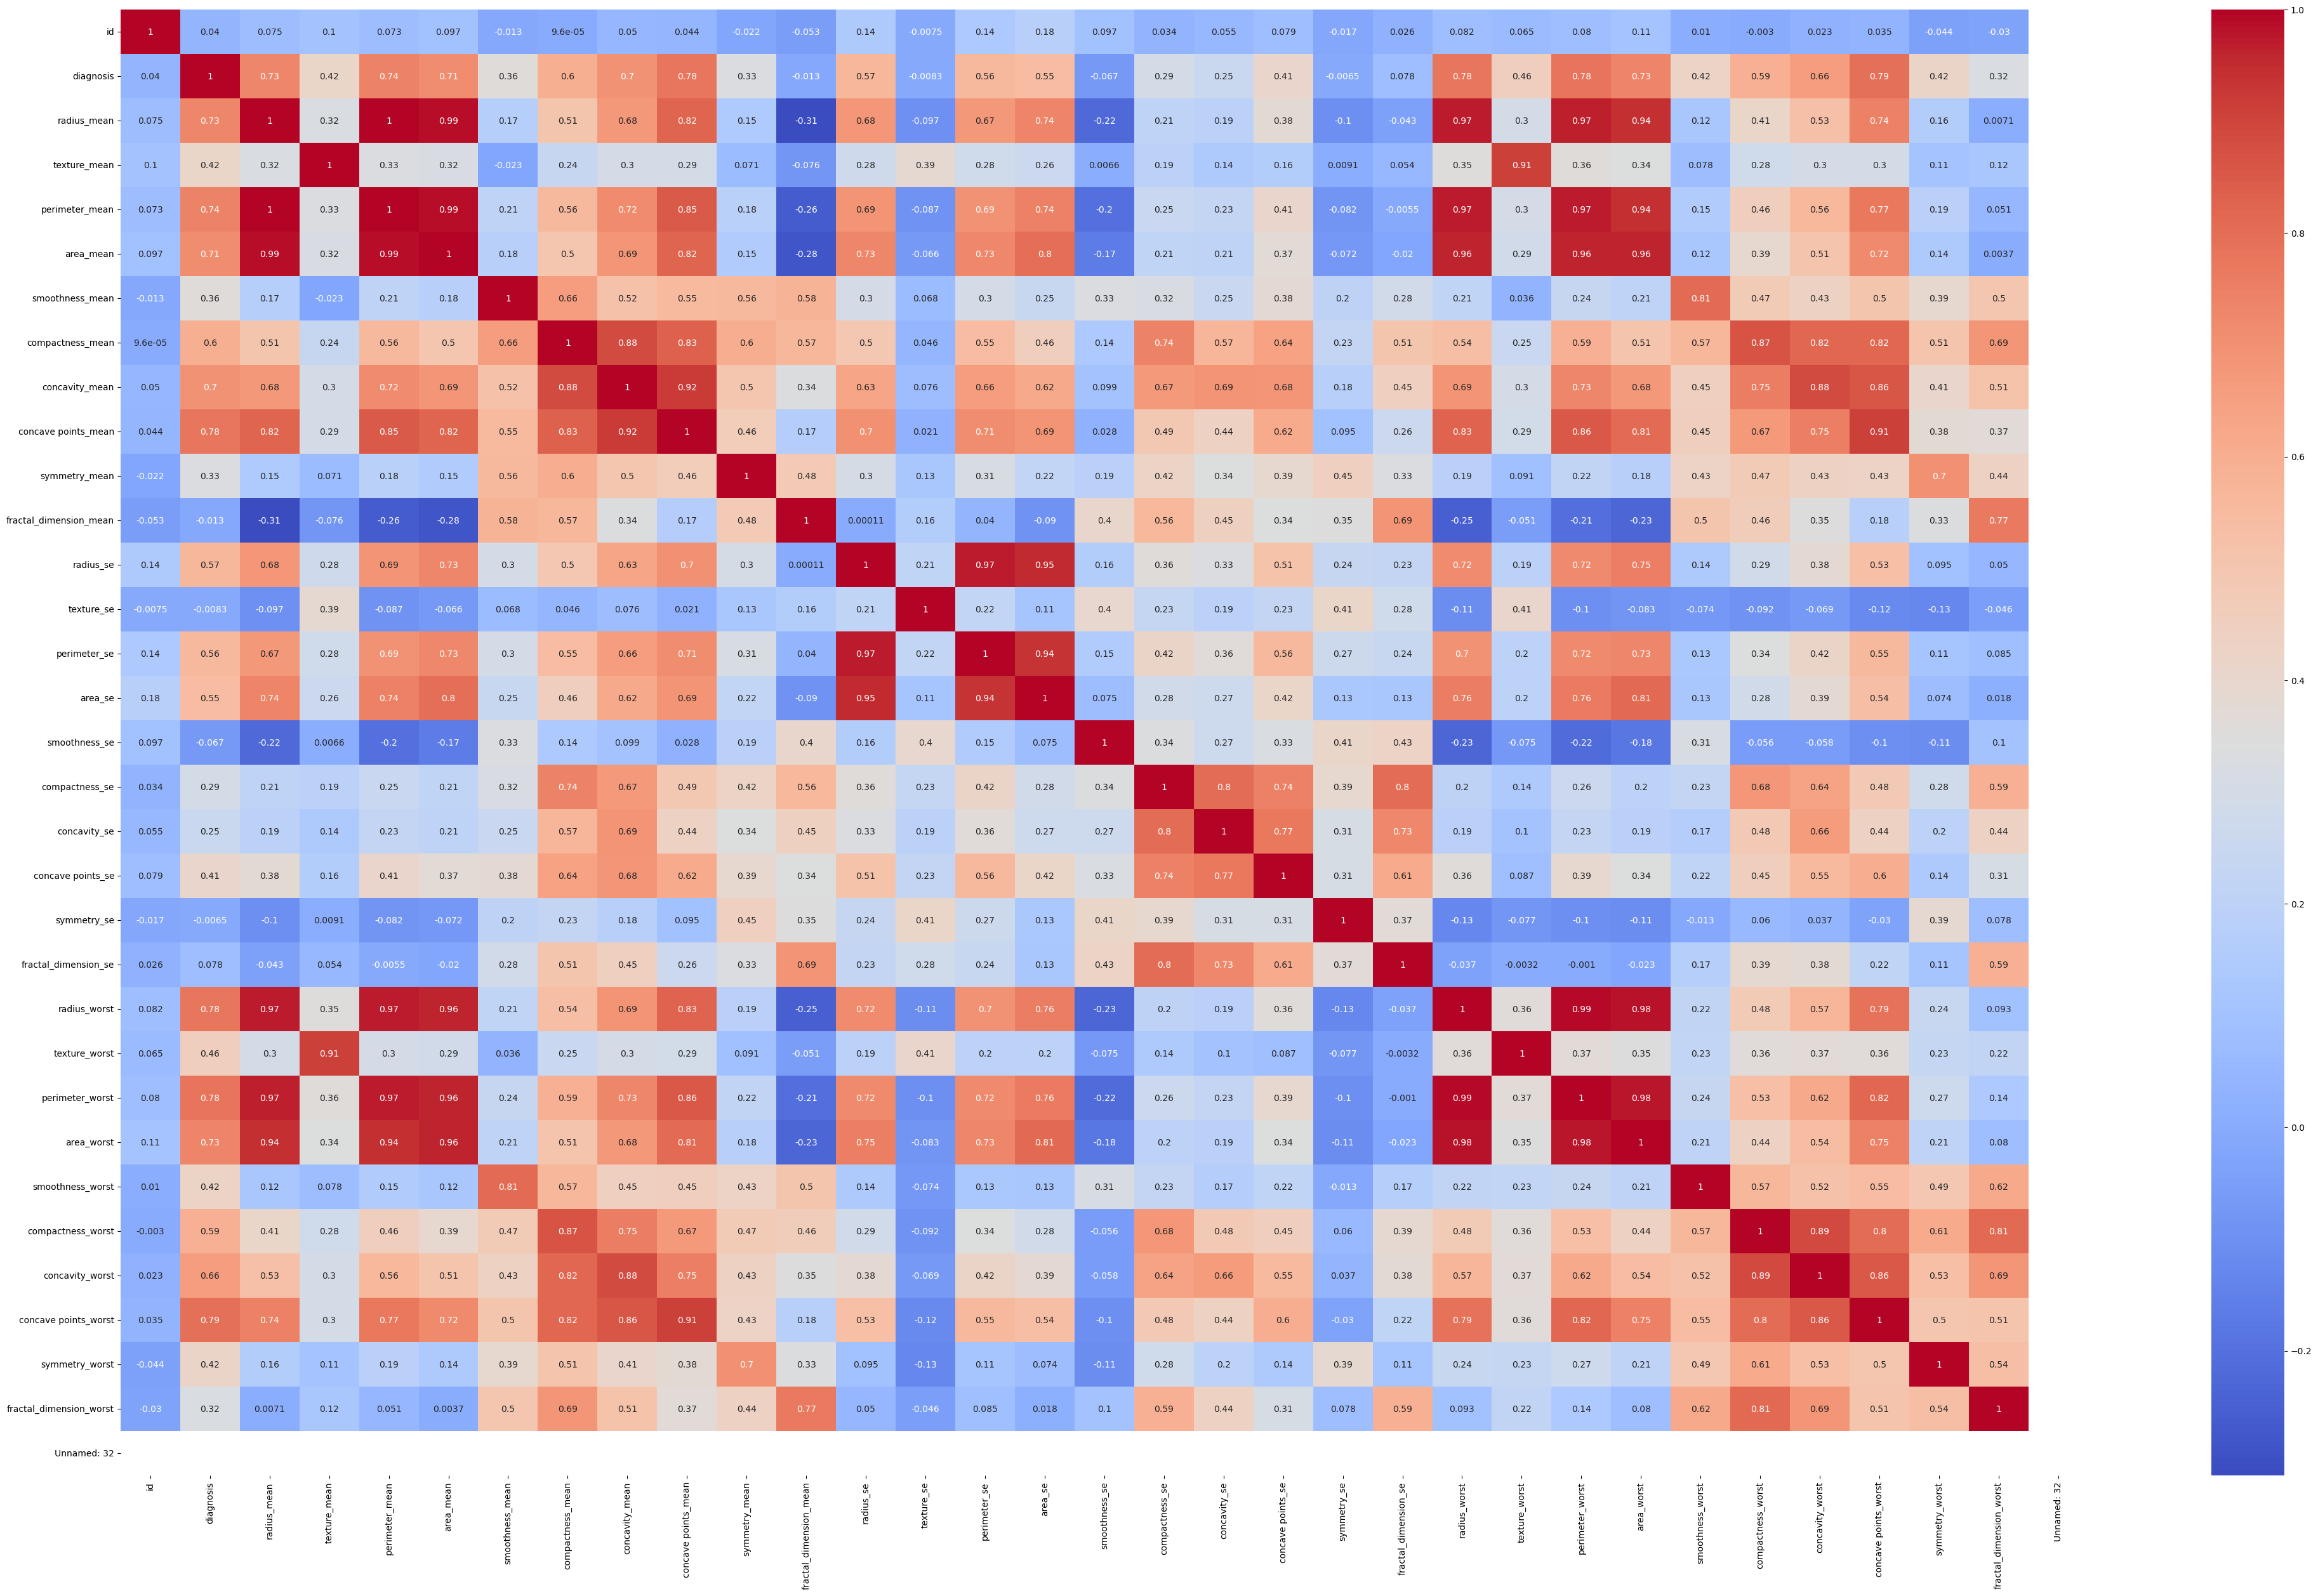

In [14]:
corr=df.corr()
plt.figure(figsize=(50,30))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [16]:
corr['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

## selecting the best feature by inbuilt mmethods

In [17]:
# Separate features and target
X = df.drop([ 'diagnosis'], axis=1)  # Exclude id and diagnosis from features
y = df['diagnosis']

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636

In [21]:
X.tail()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [20]:
X.drop(columns=['Unnamed: 32'])

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
# high correlation points
high_corr_features=corr[abs(corr['diagnosis']>0.7)]['diagnosis'].index.tolist()

print('Features with corelation above 0.7 with diagnosis')
print(high_corr_features)

Features with corelation above 0.7 with diagnosis
['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


In [23]:
selected_features = [
    'concave points_worst',
    'perimeter_worst',
    'concave points_mean',
    'radius_worst',
    'perimeter_mean',
    'area_worst',
    'radius_mean',
    'area_mean',
    'concavity_mean',
    'concavity_worst',
]

# Create a new dataframe with selected features
X = df[selected_features] 

In [24]:
X

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000
...,...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.9387


In [25]:
y=df['diagnosis']

In [26]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## grid search

In [27]:
param_grid={
    'C':[0.1,10,100],
    'gamma':['scale','auto']+[0.001,0.01,0.1,1],
    'kernel':['linear','rbf','poly']
}

## random search

In [28]:
param_distributions={
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

In [56]:
# #model tuning with grid search
# grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# print("Best Parameters (Grid Search):", grid_search.best_params_)

In [29]:
random_search = RandomizedSearchCV(SVC(), param_distributions, n_iter=30, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
print("Best Parameters (Random Search):", random_search.best_params_)

c:\Users\surya\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 12 is smaller than n_iter=30. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters (Random Search): {'kernel': 'linear', 'gamma': 'scale', 'C': 1}


In [30]:
# Train and evaluate with Random Search parameters
model_random_search = SVC(kernel='linear', gamma='scale', C=1)
model_random_search.fit(X_train, y_train)
y_pred_random_search = model_random_search.predict(X_test)
accurecy=accuracy_score(y_test,y_pred_random_search)
print(f'Accurecy: {accurecy * 100:.2f}%')
print("Confusion matrix: \n",confusion_matrix(y_test,y_pred_random_search))
print("Classification Report (Random Search):")
print(classification_report(y_test, y_pred_random_search))

Accurecy: 99.12%
Confusion matrix: 
 [[71  0]
 [ 1 42]]
Classification Report (Random Search):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## saving the trained model in the form of pickle object for using it in the fast api app

In [35]:
with open("output/breast_cancer_model_detector.pkl","wb") as file:
    pickle.dump(model_random_search,file)
    
print("Model saved successfully in the form of pickle file breast_cancer_model_detector.pkl",)

Model saved successfully in the form of pickle file breast_cancer_model_detector.pkl


In [68]:
y_test.value_counts()

0    71
1    43
Name: diagnosis, dtype: int64

In [65]:
# Train and evaluate with Random Search parameters
model_random_search = SVC(kernel='rbf', gamma='scale', C=1)
model_random_search.fit(X_train, y_train)
y_pred_random_search = model_random_search.predict(X_test)
accurecy=accuracy_score(y_test,y_pred_random_search)
print(f'Accurecy: {accurecy * 100:.2f}%')
print("Confusion matrix: \n",confusion_matrix(y_test,y_pred_random_search))
print("Classification Report (Random Search):")
print(classification_report(y_test, y_pred_random_search))

Accurecy: 94.74%
Confusion matrix: 
 [[71  0]
 [ 6 37]]
Classification Report (Random Search):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

